<a href="https://colab.research.google.com/github/Bhanukoya/Masters-Project/blob/master/Concrete_Tensile_strength_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_excel('drive/My Drive/Concrete_Data.xls', sheet_name='Sheet1')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.shape

(1030, 9)

In [ ]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
df.columns = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "Compressive_Strength"]

In [ ]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# Exploratoty data analysis

In [ ]:
df.isnull().sum()

Cement                  0
BlastFurnaceSlag        0
FlyAsh                  0
Water                   0
Superplasticizer        0
CoarseAggregate         0
FineAggregate           0
Age                     0
Compressive_Strength    0
dtype: int64

In [ ]:
df.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   BlastFurnaceSlag      1030 non-null   float64
 2   FlyAsh                1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   CoarseAggregate       1030 non-null   float64
 6   FineAggregate         1030 non-null   float64
 7   Age                   1030 non-null   int64  
 8   Compressive_Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
df.isna().sum()

Cement                  0
BlastFurnaceSlag        0
FlyAsh                  0
Water                   0
Superplasticizer        0
CoarseAggregate         0
FineAggregate           0
Age                     0
Compressive_Strength    0
dtype: int64

## Univariate Analysis on Features

In [ ]:
import scipy
from scipy import stats

In [ ]:
sns.set(style='whitegrid')

In [ ]:
# Function to find number of ouliers and to draw feature plots

def Feature_analysis(x):


  Q1 = df[x].quantile(q=0.25)
  Q3 = df[x].quantile(q=0.75)
  IQR = stats.iqr(df[x])

  print('1st Quartile of ' + x + ' :' , Q1)
  print('3rd Quartile of ' + x + ' :', Q3)
  print('Inter Quartile range of ' + x + ' :', IQR, '\n')



  Lower_outlier = Q1 - 1.5*(IQR)
  upper_outlier = Q3 + 1.5*(IQR)

  print('Lower outlier value in ' + x + ' :', Lower_outlier)
  print('upper outlier value in ' + x + ' :', upper_outlier, '\n')



  print('Number of lower outliers in ' + x + ' :' ,df[df[x]<Lower_outlier][x].count())
  print('Number of upper outliers in ' + x + ' :' ,df[df[x]>upper_outlier][x].count())

  print('% of lower outliers in ' + x + ' :', round(df[df[x]<Lower_outlier][x].count()*100/len(df.Cement)))
  print('% of upper outliers in ' + x + ' :', round(df[df[x]>upper_outlier][x].count()*100/len(df.Cement)),'\n' )




  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))

  # Distribution plot
  sns.distplot(df[x], ax=ax1)
  ax1.set_xlabel(x, fontsize=15)
  ax1.set_title('Distribution plot', fontsize=20)
  ax1.tick_params(labelsize=15)

  # Box plot
  sns.boxplot(df[x], ax=ax2, orient='v' )
  ax2.set_ylabel(x, fontsize=15)
  ax2.set_title( x +' ' + 'Distribution', fontsize=20)
  ax2.tick_params(labelsize=15)


  # Histogram
  ax3.hist(df[x])
  ax3.set_xlabel(x, fontsize = 15)
  ax3.set_title('Histogram', fontsize = 20)
  ax3.tick_params(labelsize=15)


  plt.tight_layout()

1st Quartile of Cement : 192.375
3rd Quartile of Cement : 350.0
Inter Quartile range of Cement : 157.625 

Lower outlier value in Cement : -44.0625
upper outlier value in Cement : 586.4375 

Number of lower outliers in Cement : 0
Number of upper outliers in Cement : 0
% of lower outliers in Cement : 0.0
% of upper outliers in Cement : 0.0 



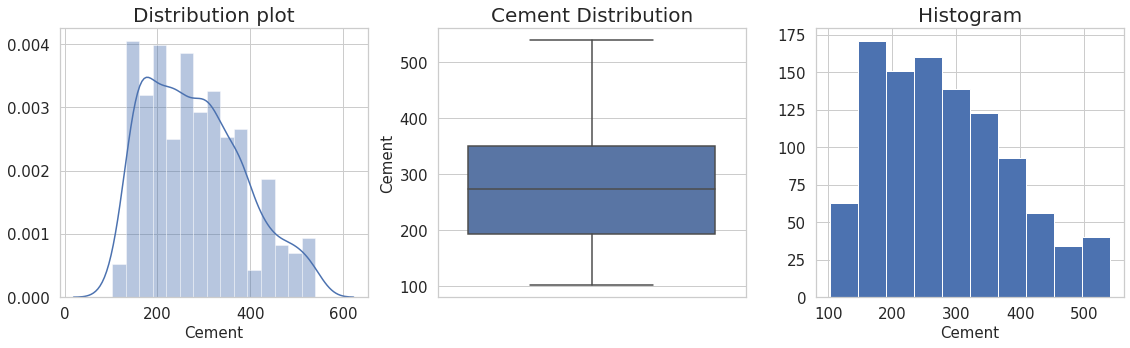

In [ ]:
Feature_analysis('Cement')

1st Quartile of BlastFurnaceSlag : 0.0
3rd Quartile of BlastFurnaceSlag : 142.95
Inter Quartile range of BlastFurnaceSlag : 142.95 

Lower outlier value in BlastFurnaceSlag : -214.42499999999998
upper outlier value in BlastFurnaceSlag : 357.375 

Number of lower outliers in BlastFurnaceSlag : 0
Number of upper outliers in BlastFurnaceSlag : 2
% of lower outliers in BlastFurnaceSlag : 0.0
% of upper outliers in BlastFurnaceSlag : 0.0 



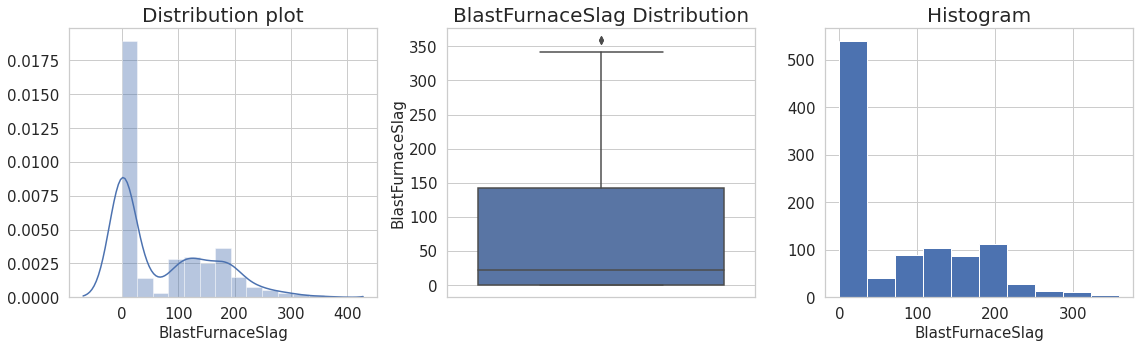

In [ ]:
Feature_analysis('BlastFurnaceSlag')

1st Quartile of FlyAsh : 0.0
3rd Quartile of FlyAsh : 118.27
Inter Quartile range of FlyAsh : 118.27 

Lower outlier value in FlyAsh : -177.405
upper outlier value in FlyAsh : 295.675 

Number of lower outliers in FlyAsh : 0
Number of upper outliers in FlyAsh : 0
% of lower outliers in FlyAsh : 0.0
% of upper outliers in FlyAsh : 0.0 



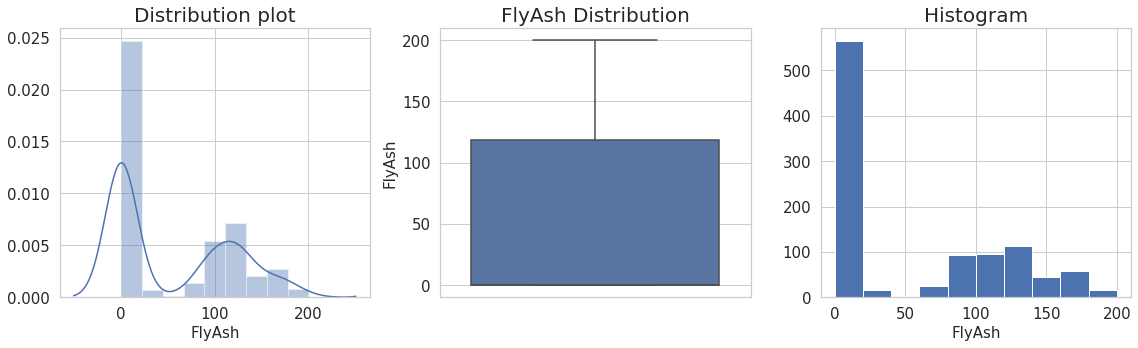

In [ ]:
Feature_analysis('FlyAsh')

1st Quartile of Water : 164.9
3rd Quartile of Water : 192.0
Inter Quartile range of Water : 27.099999999999994 

Lower outlier value in Water : 124.25000000000001
upper outlier value in Water : 232.64999999999998 

Number of lower outliers in Water : 5
Number of upper outliers in Water : 4
% of lower outliers in Water : 0.0
% of upper outliers in Water : 0.0 



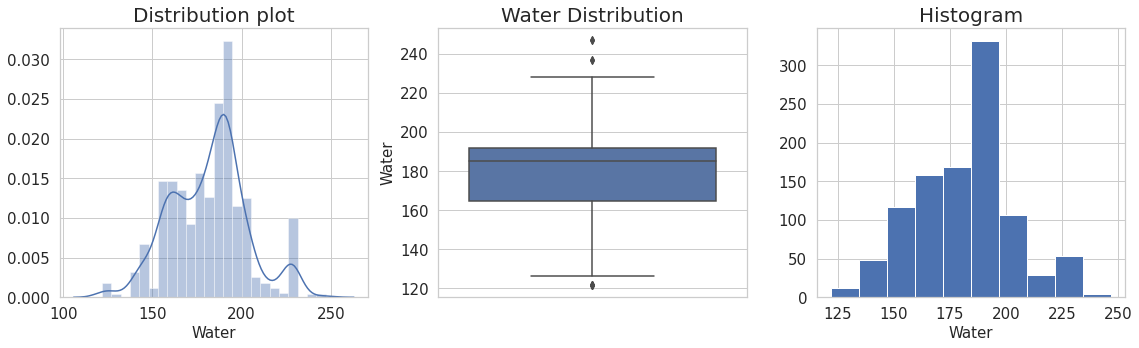

In [ ]:
Feature_analysis('Water')

1st Quartile of Superplasticizer : 0.0
3rd Quartile of Superplasticizer : 10.16
Inter Quartile range of Superplasticizer : 10.16 

Lower outlier value in Superplasticizer : -15.24
upper outlier value in Superplasticizer : 25.4 

Number of lower outliers in Superplasticizer : 0
Number of upper outliers in Superplasticizer : 10
% of lower outliers in Superplasticizer : 0.0
% of upper outliers in Superplasticizer : 1.0 



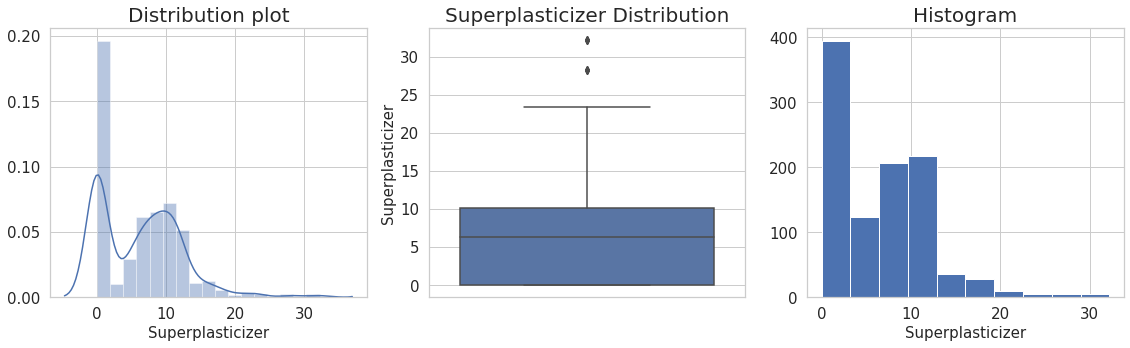

In [ ]:
Feature_analysis('Superplasticizer')

1st Quartile of CoarseAggregate : 932.0
3rd Quartile of CoarseAggregate : 1029.4
Inter Quartile range of CoarseAggregate : 97.40000000000009 

Lower outlier value in CoarseAggregate : 785.8999999999999
upper outlier value in CoarseAggregate : 1175.5000000000002 

Number of lower outliers in CoarseAggregate : 0
Number of upper outliers in CoarseAggregate : 0
% of lower outliers in CoarseAggregate : 0.0
% of upper outliers in CoarseAggregate : 0.0 



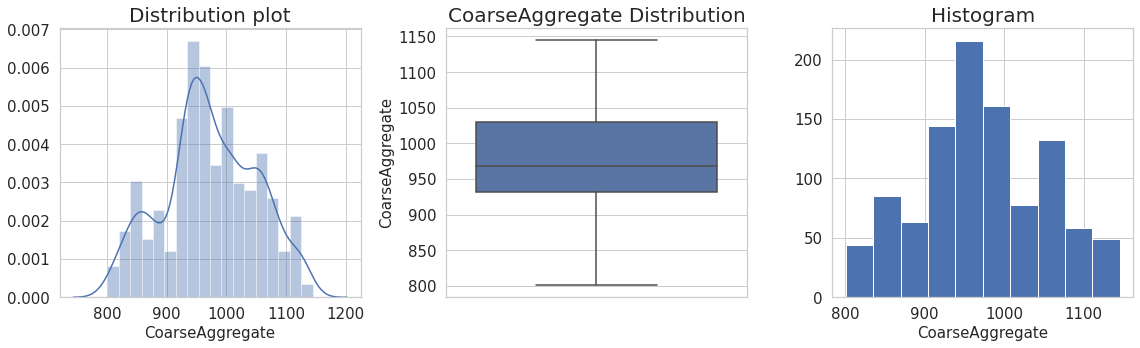

In [ ]:
Feature_analysis('CoarseAggregate')

1st Quartile of FineAggregate : 730.9499999999999
3rd Quartile of FineAggregate : 824.0
Inter Quartile range of FineAggregate : 93.05000000000007 

Lower outlier value in FineAggregate : 591.3749999999998
upper outlier value in FineAggregate : 963.575 

Number of lower outliers in FineAggregate : 0
Number of upper outliers in FineAggregate : 5
% of lower outliers in FineAggregate : 0.0
% of upper outliers in FineAggregate : 0.0 



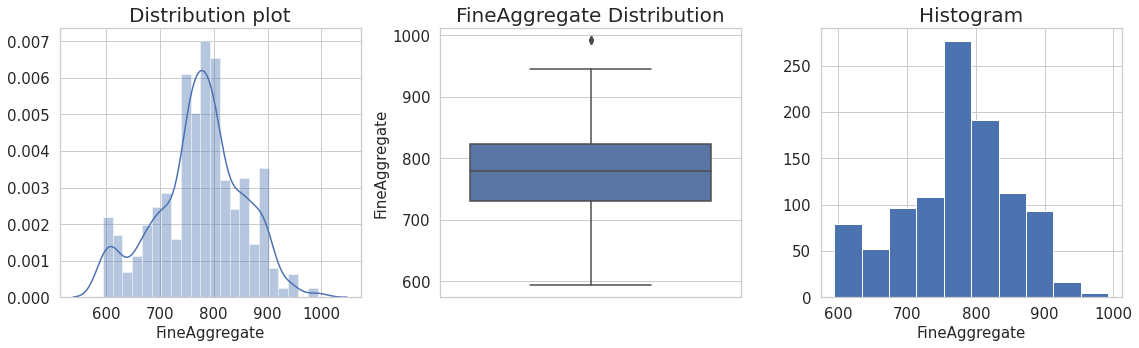

In [ ]:
Feature_analysis('FineAggregate')

1st Quartile of Age : 7.0
3rd Quartile of Age : 56.0
Inter Quartile range of Age : 49.0 

Lower outlier value in Age : -66.5
upper outlier value in Age : 129.5 

Number of lower outliers in Age : 0
Number of upper outliers in Age : 59
% of lower outliers in Age : 0.0
% of upper outliers in Age : 6.0 



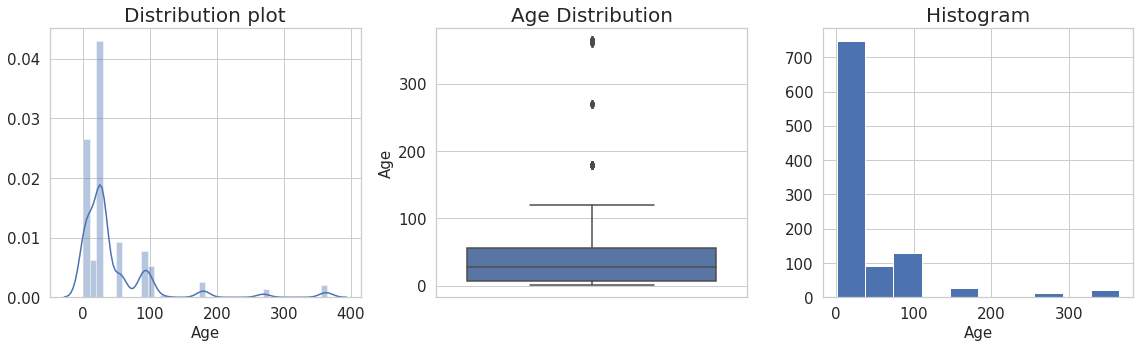

In [ ]:
Feature_analysis('Age')

## Multivariate Anslysis

In [ ]:
df.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'Compressive_Strength'],
      dtype='object')

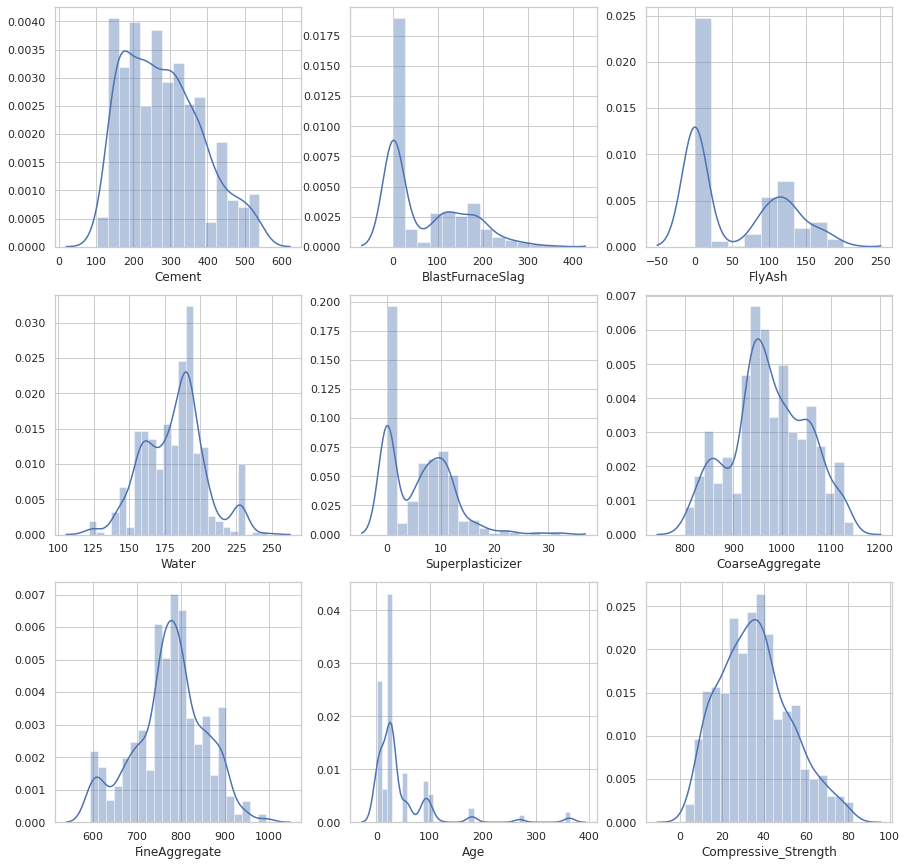

In [ ]:
# Distribution plots
fig, ax = plt.subplots(3,3, figsize = (15,15))
index = 0

for i in range(0,3):
  for j in range(0,3):
    sns.distplot(df[df.columns[index]] , ax=ax[i][j])
    index = index + 1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4948a0d30>,
      dtype=object)

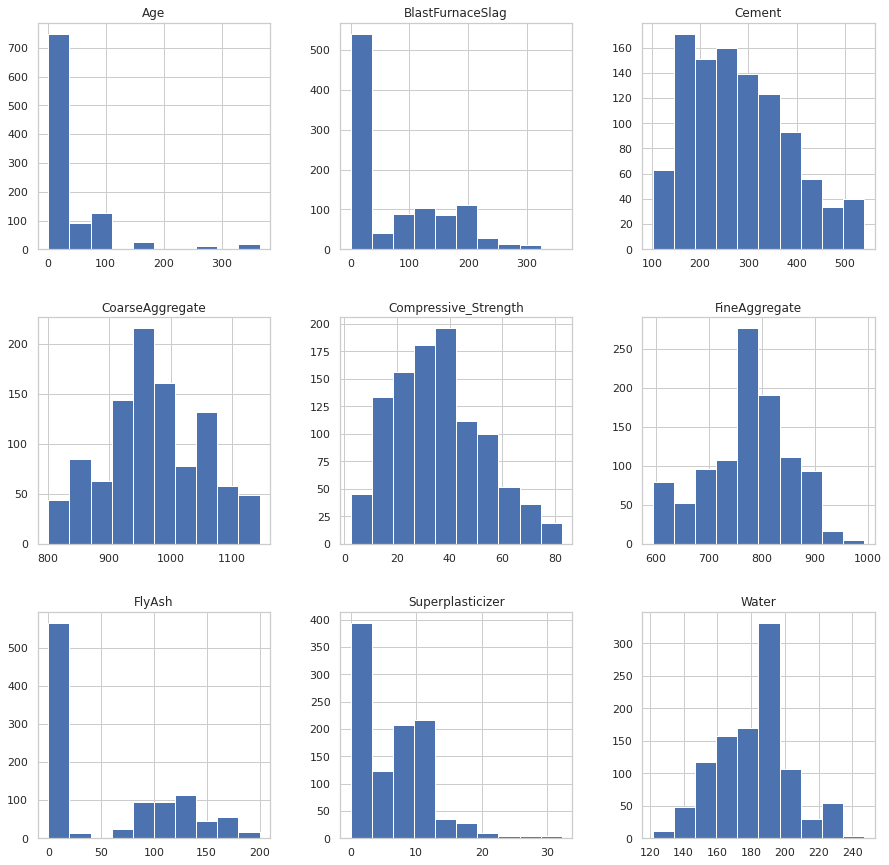

In [ ]:
# Histogram
df.hist(figsize = (15,15))

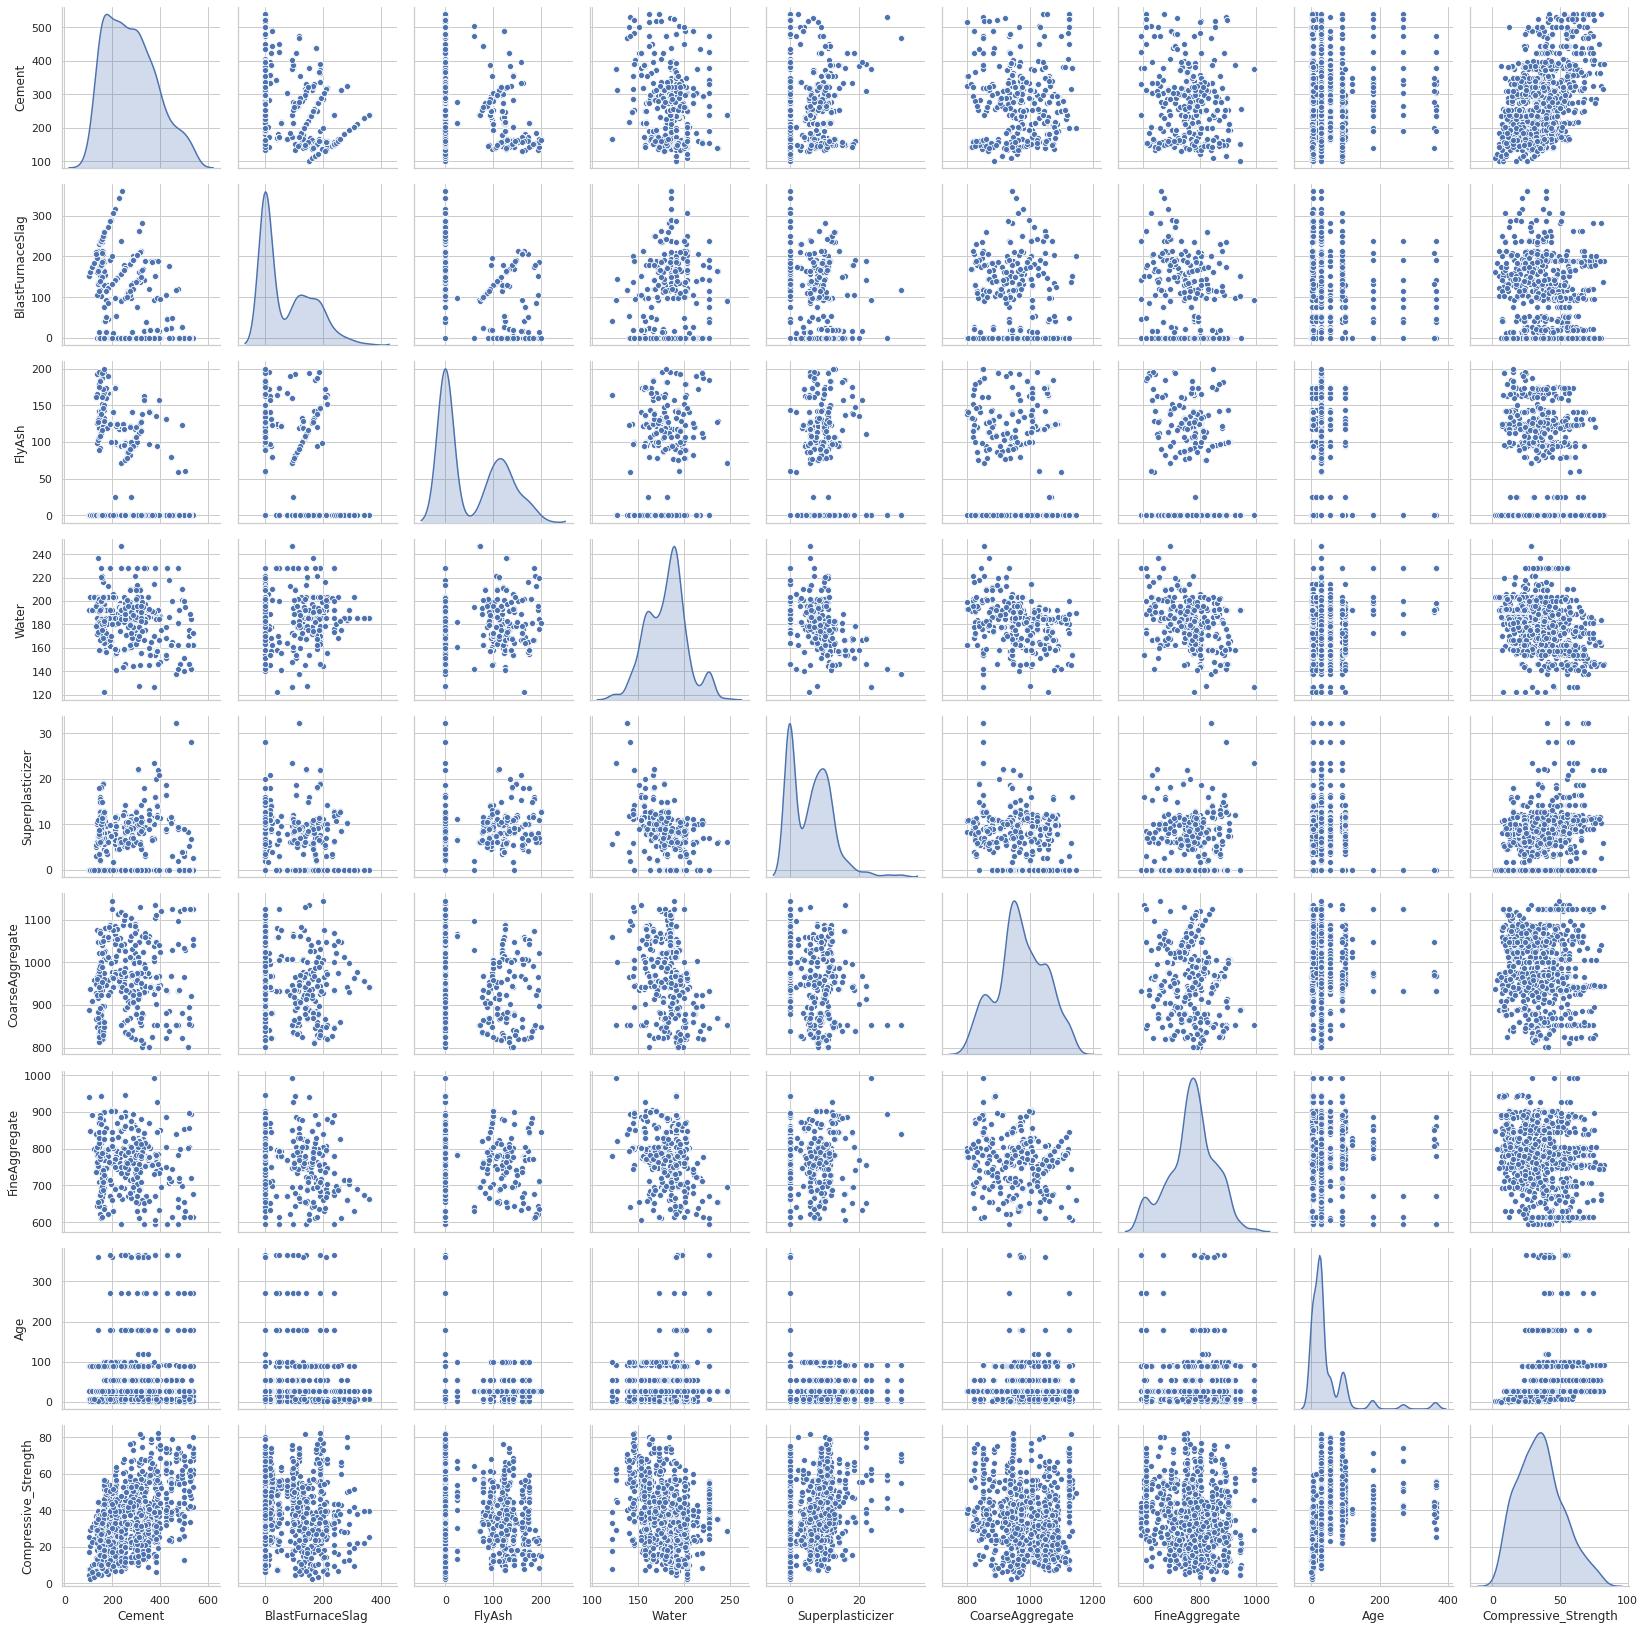

In [ ]:
# pairplots
sns.pairplot(df, palette='gist_heat', diag_kind='kde')

In [ ]:
cor_mat = df.corr()

Text(0.5, 1.0, 'Correlation between Features')

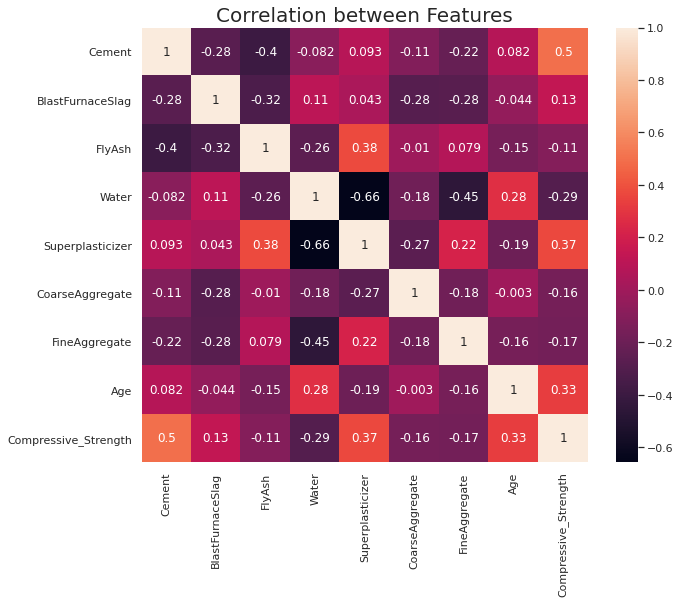

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(cor_mat, annot=True)

plt.title('Correlation between Features', fontsize=20)

## Outlier detection

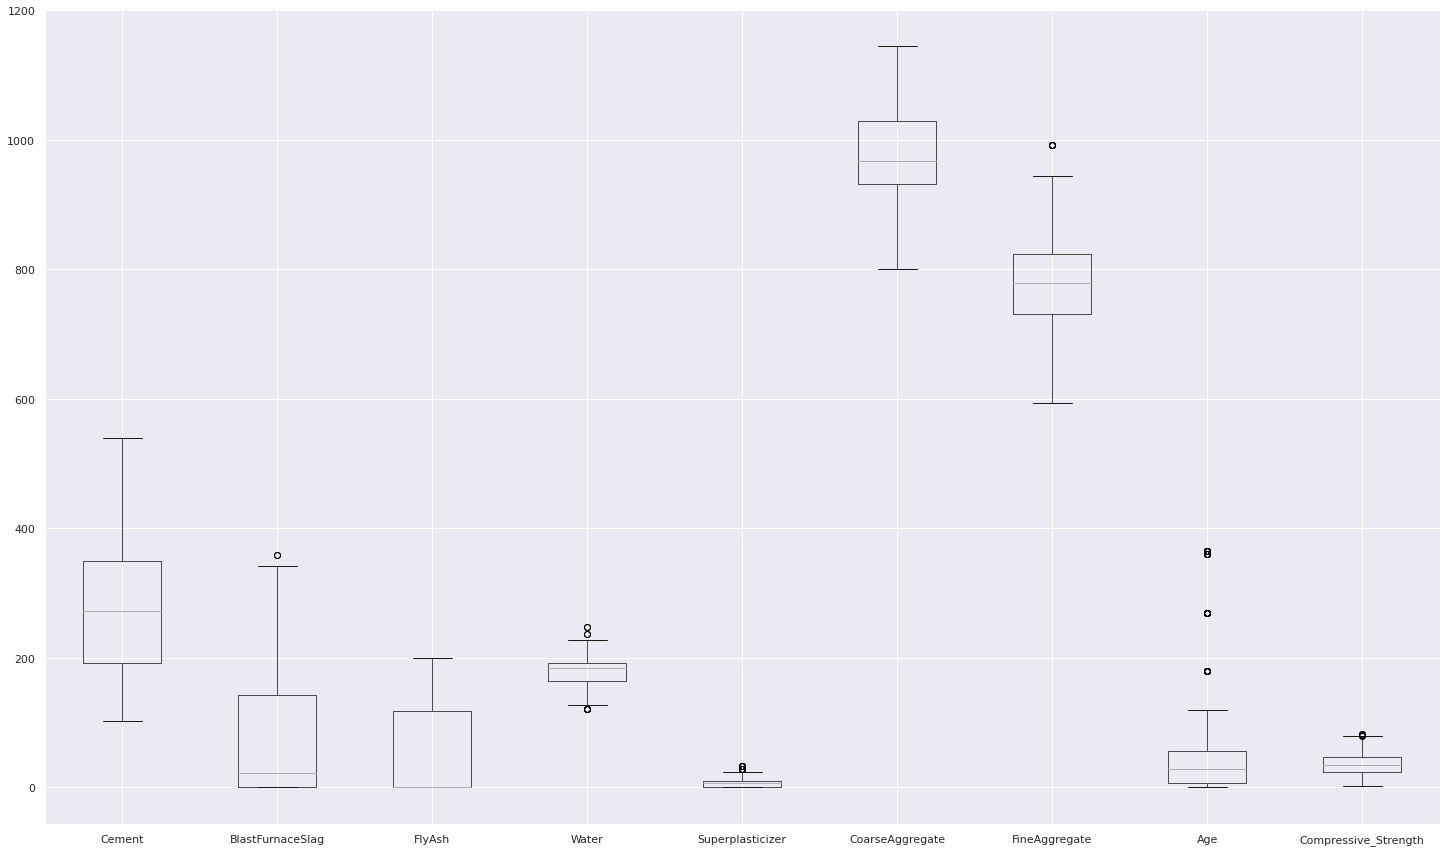

In [ ]:
sns.set(style='darkgrid')
df.boxplot(figsize=(25,15))

In [ ]:
def Find_outliers(x):

  print('Number of outliers in ' + x + ' :',df[((df[x]-df[x].mean())/df[x].std())>3][x].count())

  print('Record conatining outliers in ' + x + ' :\n',df[((df[x]-df[x].mean())/df[x].std())>3][x])


In [ ]:
Find_outliers('BlastFurnaceSlag')

Number of outliers in BlastFurnaceSlag : 4
Record conatining outliers in BlastFurnaceSlag :
 553    359.4
559    359.4
571    342.1
584    342.1
Name: BlastFurnaceSlag, dtype: float64


In [ ]:
Find_outliers('Water')

Number of outliers in Water : 2
Record conatining outliers in Water :
 873    247.0
936    246.9
Name: Water, dtype: float64


In [ ]:
Find_outliers('Superplasticizer')

Number of outliers in Superplasticizer : 10
Record conatining outliers in Superplasticizer :
 76     32.2
79     28.2
99     32.2
102    28.2
122    32.2
125    28.2
145    32.2
148    28.2
168    32.2
171    28.2
Name: Superplasticizer, dtype: float64


In [ ]:
Find_outliers('FineAggregate')

Number of outliers in FineAggregate : 0
Record conatining outliers in FineAggregate :
 Series([], Name: FineAggregate, dtype: float64)


In [ ]:
Find_outliers('Age')

Number of outliers in Age : 33
Record conatining outliers in Age :
 2      270
3      365
4      360
6      365
12     270
17     365
24     365
25     270
26     270
30     365
31     365
33     270
34     365
35     270
41     365
42     365
56     365
60     270
61     270
63     270
65     270
66     360
604    365
610    365
616    360
620    365
622    365
756    270
769    360
792    360
798    270
814    360
820    270
Name: Age, dtype: int64


In [ ]:
df1 = df.copy()
df1.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Handling outliers

In [ ]:
for col in df1.columns[ : -1]:

  Q1 = df1[col].quantile(q=0.25)
  Q3 = df1[col].quantile(q=0.75)
  IQR = stats.iqr(df[col])

  min_outlier = Q1 - 1.5*(IQR)
  max_outlier = Q3 + 1.5*(IQR)

  df1.loc[(df1[col]< min_outlier) | (df1[col]> max_outlier), col ] = df1[col].median()


In [ ]:
df1.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0,44.296075


In [ ]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


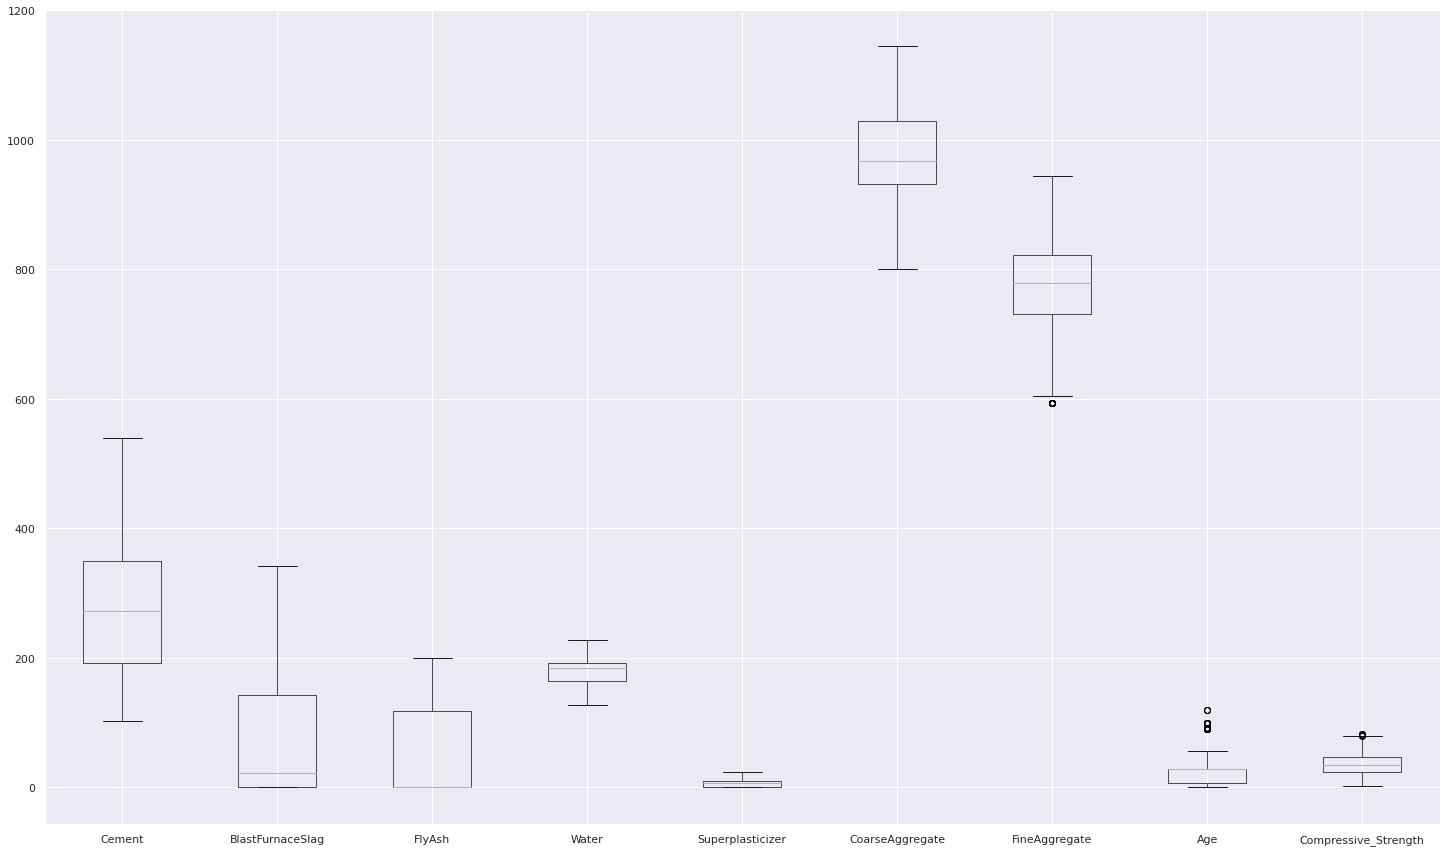

In [ ]:
sns.set(style='darkgrid')
df1.boxplot(figsize=(25,15))

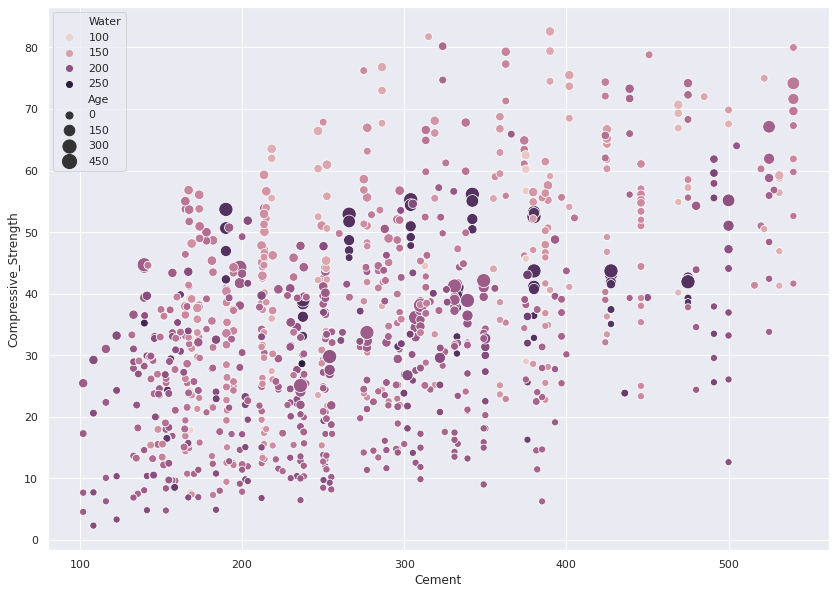

In [ ]:
plt.figure(figsize=(14,10))

sns.scatterplot(x=df.Cement, y=df.Compressive_Strength, hue=df.Water, size=df.Age, sizes=(50,200) )

In [ ]:
x = df.iloc[ :, : -1]
y = df.Compressive_Strength

x

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score ,accuracy_score, precision_score, mean_squared_error

ss = StandardScaler()

x = ss.fit_transform(x)

x

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x_train,y_train)

print('Train score',lr_model.score(x_train,y_train))

print('Test score',lr_model.score(x_test, y_test))



Train score 0.611553303814472
Test score 0.6232164640727522


In [ ]:
lr_cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print(lr_cv_score)
print(np.mean(lr_cv_score))

[-1.23720016  0.5274709   0.35247578  0.32762641  0.3125442   0.22064086
  0.48962716  0.65231292  0.57869199  0.55656575]
0.2780755819787795


## Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

x = df.iloc[ :, : -1]
y = df.Compressive_Strength

x = ss.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 10)

svr_model = SVR()

svr_model.fit(x_train, y_train)

print('Train score' , svr_model.score(x_train,y_train))

print('Test score', svr_model.score(x_test, y_test))


Train score 0.6437655225322317
Test score 0.6521669636446772


In [ ]:
svr_cv_score = cross_val_score(SVR(), x, y, cv=10)

print(svr_cv_score)
print(np.mean(svr_cv_score))

[-0.14294796 -0.08073731  0.52395775  0.33256504  0.29275669  0.46130344
  0.38747995  0.56238974  0.46742944  0.44572483]
0.324992160455327


In [ ]:
from sklearn.model_selection import GridSearchCV

svr_Gs_clf = GridSearchCV(SVR(),  { 'C':list(range(2,100, 2)), 'kernel': ['linear', 'rbf', 'poly'] }, cv=10, return_train_score=False)

svr_Gs_clf.fit(x, y)

svr_df = pd.DataFrame(svr_Gs_clf.cv_results_)
print(svr_df)

print(svr_Gs_clf.best_params_)

print(svr_Gs_clf.best_score_)

     mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0         0.062167      0.002850  ...        1.218399               50
1         0.059952      0.001892  ...        0.248260               49
2         0.058983      0.001723  ...        2.466462               99
3         0.078858      0.011540  ...        1.206875               51
4         0.070305      0.001670  ...        0.273102               48
..             ...           ...  ...             ...              ...
142       0.170225      0.011161  ...        0.637498               46
143       0.647043      0.153112  ...       18.768298              146
144       0.588823      0.075482  ...        1.246668               88
145       0.177685      0.009369  ...        0.640370               47
146       0.668376      0.110982  ...       18.855376              147

[147 rows x 20 columns]
{'C': 18, 'kernel': 'rbf'}
0.5345521300424284


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

from sklearn.model_selection import train_test_split

x = df.iloc[ :, : -1]
y = df.Compressive_Strength

x = ss.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 10)

dt_model.fit(x_train, y_train)

print( 'Train score' ,dt_model.score(x_train, y_train))

print('Test score',dt_model.score(x_test , y_test))

print(dt_model.get_params)


Train score 0.9963836598780416
Test score 0.8484005608227669
<bound method BaseEstimator.get_params of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')>


In [ ]:
dt_cv_score = cross_val_score(DecisionTreeRegressor(), x, y, cv=10)

print(dt_cv_score)
print(np.mean(dt_cv_score))

[-0.59757788  0.58136584  0.14428865  0.4835284   0.15229681  0.56340657
  0.72092864  0.65718772  0.92782064  0.90606809]
0.4539313478310765


In [ ]:
dt_Gs_clf = GridSearchCV(DecisionTreeRegressor(), {'criterion': ['mse', 'mae']}, cv=10, return_train_score=False)
dt_Gs_clf.fit(x,y)

dt_df = pd.DataFrame(dt_Gs_clf.cv_results_)
print(dt_df)

print(dt_Gs_clf.best_params_)

print(dt_Gs_clf.best_score_)


   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.004671      0.000514  ...        0.382031                2
1       0.045603      0.003381  ...        0.282611                1

[2 rows x 19 columns]
{'criterion': 'mae'}
0.5158637298464213


## Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

x = df.iloc[ :, : -1]
y = df.Compressive_Strength

x = ss.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.1, random_state = 10)

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

print('Train score', rf_model.score(x_train, y_train))
print('Test score',rf_model.score(x_test, y_test))

Train score 0.9860855762908469
Test score 0.9234541747306841


In [ ]:
rf_cv_score = cross_val_score(RandomForestRegressor(), x, y , cv=10, )

print(rf_cv_score)
print(np.mean(rf_cv_score))


[0.48517614 0.63976095 0.75052907 0.59160976 0.57723439 0.70145932
 0.85547696 0.81931615 0.93521559 0.92569441]
0.7281472750604872


In [ ]:
rf_Gs_clf = GridSearchCV( RandomForestRegressor(), {'n_estimators':list(range(10, 201, 10)) }, cv=10, return_train_score=False)
rf_Gs_clf.fit(x,y)

rf_df = pd.DataFrame(rf_Gs_clf.cv_results_)
print(rf_df)

print(rf_Gs_clf.best_params_)

print(rf_Gs_clf.best_score_)


    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        0.036047      0.001055  ...        0.133260               19
1        0.073122      0.003503  ...        0.142922               12
2        0.108889      0.002693  ...        0.146808               17
3        0.144503      0.003956  ...        0.146997               18
4        0.175376      0.004430  ...        0.138088                8
5        0.217095      0.005587  ...        0.146239               13
6        0.251174      0.005673  ...        0.161407               20
7        0.288990      0.005822  ...        0.143136                3
8        0.324978      0.009524  ...        0.140584                6
9        0.355315      0.010279  ...        0.138595                1
10       0.389676      0.007805  ...        0.140990                5
11       0.428196      0.016503  ...        0.150614               16
12       0.463971      0.008498  ...        0.141209               11
13       0.494493   

In [ ]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


## Model selection

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

models = {
    'Support_Vector_Regressor':  {'model': SVR(), 'parameters': { 'C':list(range(2,101, 2)), 'kernel': ['linear', 'rbf', 'poly']  }  }   ,

    'Decision_Tree_Regressor': {'model': DecisionTreeRegressor(), 'parameters' : {'criterion': ['mse', 'mae']}   } ,

    'Random_Forest_Regressor': {'model': RandomForestRegressor(), 'parameters' : {'n_estimators':list(range(10, 201, 10)) }  } 
    
}

In [ ]:
scores = []

for model_name, value in models.items():

  clf = GridSearchCV( value['model'] , value['parameters'], cv=10, return_train_score=False)
  clf.fit(x,y)

  scores.append(
      { 'model': model_name,
    'best_parameters' : clf.best_params_ ,
   'best_score' : clf.best_score_
  })


model_selection_df = pd.DataFrame(scores)

In [ ]:
model_selection_df

,model,best_parameters,best_score
0,Support_Vector_Regressor,"{'C': 18, 'kernel': 'rbf'}",0.534552
1,Decision_Tree_Regressor,{'criterion': 'mae'},0.527605
2,Random_Forest_Regressor,{'n_estimators': 180},0.739895


## R2 plots

In [ ]:
from math import sqrt

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

ss = StandardScaler()

kf = KFold(n_splits=10)

mean_r2_scores = []
mean_rmse_scores = []

for k in range(1,101):
  
  
  kf = KFold(n_splits=10, shuffle=True, random_state=k)


  #model = LinearRegression()
  #model = SVR(C=18, kernel='rbf')
  model = DecisionTreeRegressor(criterion='mae')
  #model = RandomForestRegressor(n_estimators=150)
  
  r2_score = cross_val_score(model, x,y, cv=kf, scoring='r2')
  mse_score = -(cross_val_score(model, x,y, cv=kf, scoring='neg_mean_squared_error'))
  rmse_score = np.sqrt(mse_score)


  print('r2 scores for',k, 'iteration : '  ,r2_score)
  print('rmse scores for', k ,'iteration :',rmse_score)
  print('mean r2 score for',k, 'iteration :' ,np.mean(r2_score))
  print('mean rmse score for',k, 'iteration :',  np.mean(rmse_score), '\n')

  mean_r2_scores.append(np.mean(r2_score))
  mean_rmse_scores.append(np.mean(rmse_score))
  


r2 scores for 1 iteration :  [0.78079265 0.86344206 0.84191802 0.87183077 0.92825349 0.86239166
 0.89238929 0.82838972 0.75448157 0.74867186]
rmse scores for 1 iteration : [6.89401456 6.03806782 6.33602309 5.9644814  5.22657375 5.82088585
 5.41401068 6.01766181 8.73396172 8.97326863]
mean r2 score for 1 iteration : 0.8372561098929102
mean rmse score for 1 iteration : 6.541894930822747 

r2 scores for 2 iteration :  [0.87619386 0.80139613 0.90214541 0.86962653 0.87009791 0.79825415
 0.7109057  0.8339854  0.83980988 0.82964832]
rmse scores for 2 iteration : [ 4.95141841  7.77224053  5.09630307  6.45455199  5.83863217  8.60529772
 10.0668663   5.99411259  6.50660093  6.15684739]
mean r2 score for 2 iteration : 0.8332063297781234
mean rmse score for 2 iteration : 6.744287109459013 

r2 scores for 3 iteration :  [0.8609581  0.89892187 0.88028305 0.90095543 0.82434333 0.82227617
 0.87190529 0.88374889 0.85844674 0.85976832]
rmse scores for 3 iteration : [5.80811807 5.3495727  6.1385764  5.63

[0.8372561098929102, 0.8332063297781234, 0.8661607188213178, 0.8587049259708192, 0.8401993741754545, 0.8560079797411069, 0.8609868605745236, 0.8650077469615157, 0.8250696168724847, 0.8647548890490698, 0.8694288224080458, 0.8705366540462055, 0.8521951764003003, 0.8502439866996536, 0.8611345942526265, 0.8483325313252248, 0.8660290483824398, 0.8462936051251475, 0.8415330485016176, 0.8235081049762583, 0.8335087293073331, 0.8626237716139992, 0.8566882260868878, 0.8333743770237483, 0.8468556193566332, 0.8442199547510668, 0.8591686500029798, 0.8554411463474331, 0.839586114322979, 0.8365858211196328, 0.8538600875469007, 0.8492841364768566, 0.8706729693279124, 0.8298742141061843, 0.8500384724928101, 0.8441257354038566, 0.8524356007598183, 0.8394932539077624, 0.8612057546683513, 0.8637717804186453, 0.831130635275884, 0.8334339797857396, 0.8529700088870233, 0.8379127324042294, 0.8607207796794221, 0.867698861507505, 0.8547647537993648, 0.8540016777747917, 0.8523339076652648, 0.8554016426727056, 0.

(array([ 2.,  3.,  8., 14., 11., 18., 18., 18.,  7.,  1.]),
 array([0.8176351 , 0.823665  , 0.82969489, 0.83572479, 0.84175468,
        0.84778458, 0.85381447, 0.85984436, 0.86587426, 0.87190415,
        0.87793405]),
 <a list of 10 Patch objects>)

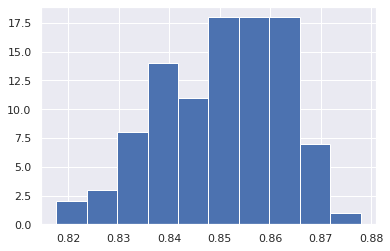

In [ ]:
print(mean_r2_scores)
print(mean_rmse_scores)
plt.hist(mean_r2_scores)


(array([ 2.,  6.,  8., 10., 18., 17., 15., 10.,  9.,  5.]),
 array([5.68036359, 5.7989544 , 5.91754522, 6.03613603, 6.15472684,
        6.27331765, 6.39190847, 6.51049928, 6.62909009, 6.7476809 ,
        6.86627172]),
 <a list of 10 Patch objects>)

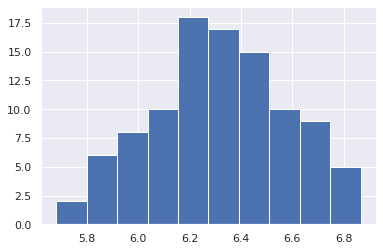

In [ ]:
plt.hist(mean_rmse_scores)

In [ ]:
std = df.Compressive_Strength.std()
std

normalized_mean_rmse_scores = [x/std for x in mean_rmse_scores]

(array([ 2.,  6.,  8., 10., 18., 17., 15., 10.,  9.,  5.]),
 array([0.3400259 , 0.34712473, 0.35422356, 0.3613224 , 0.36842123,
        0.37552006, 0.38261889, 0.38971772, 0.39681656, 0.40391539,
        0.41101422]),
 <a list of 10 Patch objects>)

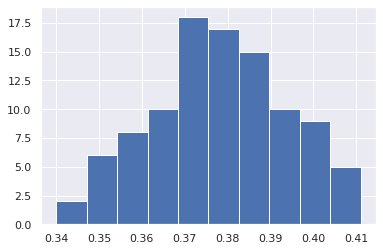

In [ ]:
plt.hist(normalized_mean_rmse_scores)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
lr = LinearRegression()
la = Lasso()
rg = Ridge()

In [ ]:
lr.fit(x_train,y_train)
la.fit(x_train,y_train)
rg.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred_lr = lr.predict(x_test)
y_pred_lasso = la.predict(x_test)
y_pred_ridge = rg.predict(x_test)

In [ ]:
lr.score(x_test,y_test)

0.6592586603415695

In [ ]:
la.score(x_test, y_test)

0.6066231924955592

In [ ]:
rg.score(x_test, y_test)

0.6590882757171892

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
print(r2_score(lr.predict(x_test),y_test))

0.39896367456891313


In [ ]:
print(r2_score(y_test, lr.predict(x_test)))

0.6592586603415695


In [ ]:
print("Model\t\t\t RMSE\tMSE\tMAE\tR2")

print('Linearregression\t {:.2f}'.format(np.sqrt(mean_squared_error(y_pred_lr, y_test))))

Model			 RMSE	MSE	MAE	R2
Linearregression	 10.28


In [ ]:
coeff_lr = lr.coef_
coeff_la = la.coef_
coeff_rg = rg.coef_

In [ ]:
coeff_lr
coeff_la
coeff_rg

array([12.21525125,  8.70288817,  5.49247417, -3.54590529,  1.55301443,
        1.26705606,  1.33269721,  7.07071569])

In [ ]:
labels = df.columns[df.columns!= 'Compressive_Strength']


In [ ]:
labels

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age'],
      dtype='object')

[Text(0, 0, 'Cement'),
 Text(0, 0, 'BlastFurnaceSlag'),
 Text(0, 0, 'FlyAsh'),
 Text(0, 0, 'Water'),
 Text(0, 0, 'Superplasticizer'),
 Text(0, 0, 'CoarseAggregate'),
 Text(0, 0, 'FineAggregate'),
 Text(0, 0, 'Age')]

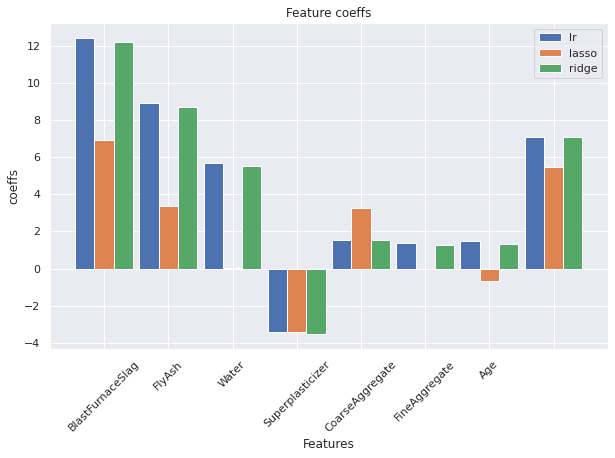

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

x=np.arange(len(labels))

a = plt.bar( x-0.3 ,coeff_lr, width=0.3, label='lr')
plt.bar(  x,coeff_la, width=0.3, label='lasso')
plt.bar( x+0.3,coeff_rg, width=0.3, label='ridge')

plt.xlabel('Features')
plt.ylabel('coeffs')
plt.title('Feature coeffs')
plt.legend()


ax.set_xticklabels(labels, rotation=45)

<BarContainer object of 8 artists>

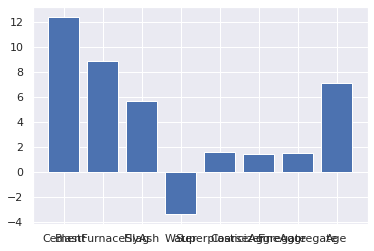

In [ ]:
plt.bar( labels ,coeff_lr)

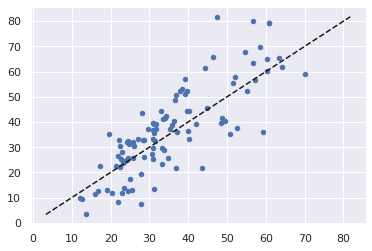

In [ ]:
plt.scatter(y_pred_lr, y_test, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

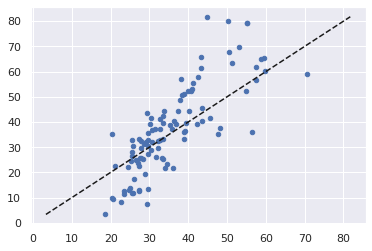

In [ ]:
plt.scatter(y_pred_lasso, y_test, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

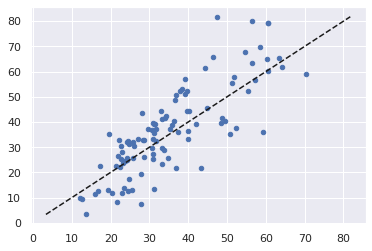

In [ ]:
plt.scatter(y_pred_ridge, y_test, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

In [ ]:
print(y_pred_lr[0:4])
print(y_pred_lasso[0:4])

print(y_pred_ridge[0:4])


[48.50604612 13.69296953 51.94792873 36.35783294]
[39.36678399 18.65576061 42.52492192 36.38361247]
[48.35289852 13.73209095 51.77512134 36.35438475]
